In [1]:
import osmnx as ox
import networkx as nx

In [2]:
# load in the plot
G = ox.graph_from_place("Houston, Texas, USA", network_type="drive")

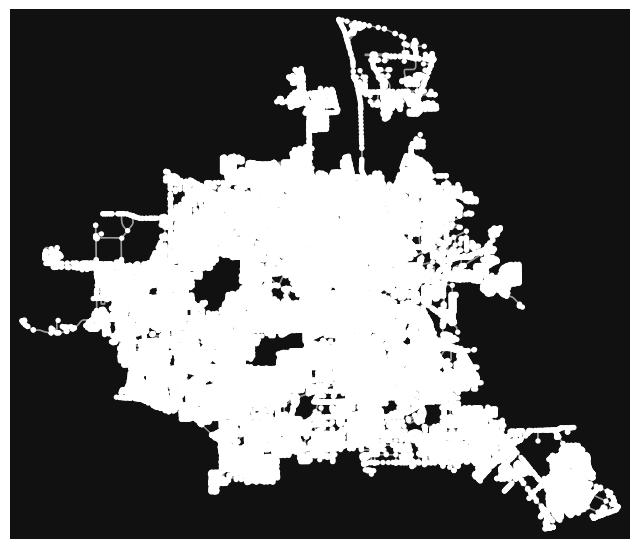

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [3]:
ox.plot_graph(G)

In [4]:
# impute speed on all edges missing data
G = ox.add_edge_speeds(G)

# calculate travel time (seconds) for all edges
G = ox.add_edge_travel_times(G)

In [5]:
G = ox.convert.to_digraph(G)

In [6]:
# Assuming G is your graph
all_nodes = list(G.nodes)
print(all_nodes)  # List of all node IDs
'''
odes = list(G.nodes(data=True))
edges = list(G.edges(data=True))
for u, v, data in G.edges(data=True):
    travel_speed = data.get('speed_kph', 'Unknown')  # Replace 'speed_kph' with the actual key if different
    print(f"Edge from {u} to {v} has travel speed: {travel_speed} km/h")
    '''

[151365298, 151365299, 151365329, 151365331, 151365339, 151365341, 151365886, 151366108, 151366109, 151366111, 151366417, 151366418, 151366419, 151367846, 151367866, 151368196, 151368248, 151368270, 151369149, 151369607, 151369608, 151369613, 151369738, 151369795, 151369796, 151369957, 151369969, 151370387, 151370392, 151370393, 151370394, 151370606, 151371308, 151371351, 151371358, 151371756, 151371794, 151371873, 151371900, 151372172, 151372310, 151373044, 151373046, 151373052, 151373062, 151373073, 151373078, 151373095, 151373112, 151373703, 151373722, 151373731, 151373806, 151373816, 151375675, 151375730, 151375772, 151375776, 151376125, 151376201, 151376209, 151377411, 151377421, 151377504, 151377515, 151378108, 151378598, 151378601, 151378816, 151378883, 151378916, 151379822, 151379886, 151379892, 151379897, 151381943, 151381963, 151382062, 151382075, 151382141, 151382156, 151382824, 151383199, 151383201, 151383499, 151383504, 151383550, 151385047, 151385050, 151385056, 151385059

'\nodes = list(G.nodes(data=True))\nedges = list(G.edges(data=True))\nfor u, v, data in G.edges(data=True):\n    travel_speed = data.get(\'speed_kph\', \'Unknown\')  # Replace \'speed_kph\' with the actual key if different\n    print(f"Edge from {u} to {v} has travel speed: {travel_speed} km/h")\n    '

In [7]:
len(all_nodes)

60191

In [8]:
from a_star_implementation import AStar
from dijkstra_implementation import Dijkstra
import random 
import numpy as np

'''
simulation of the algorithm for N iterations, using the euclidean distance as a metric
'''

a_star_imp = AStar()
dijkstra_imp = Dijkstra()

paths_a_star = []
costs_a_star = []

paths_dijkstra = []
costs_dijkstra = []

s0 = -1
s1 = -1
N = 100

for _ in range(N):
    while s0 == s1:
        s0 = random.randint(0, len(all_nodes))
        s1 = random.randint(0, len(all_nodes))
    start = all_nodes[s0]
    goal = all_nodes[s1]

    path_a_star, cost_a_star = a_star_imp.a_star(graph=G, start=start, goal=goal, heuristic=a_star_imp.euclidean_distance, attribute = "travel_time")

    path_dijkstra, cost_dijkstra = dijkstra_imp.get_shortest_path(graph=G, start = start, goal = goal)

    if cost_a_star < np.inf and cost_dijkstra < np.inf:
        paths_a_star.append(path_a_star)
        costs_a_star.append(cost_a_star)
        paths_dijkstra.append(path_dijkstra)
        costs_dijkstra.append(cost_dijkstra)

    s0 = -1
    s1 = -1

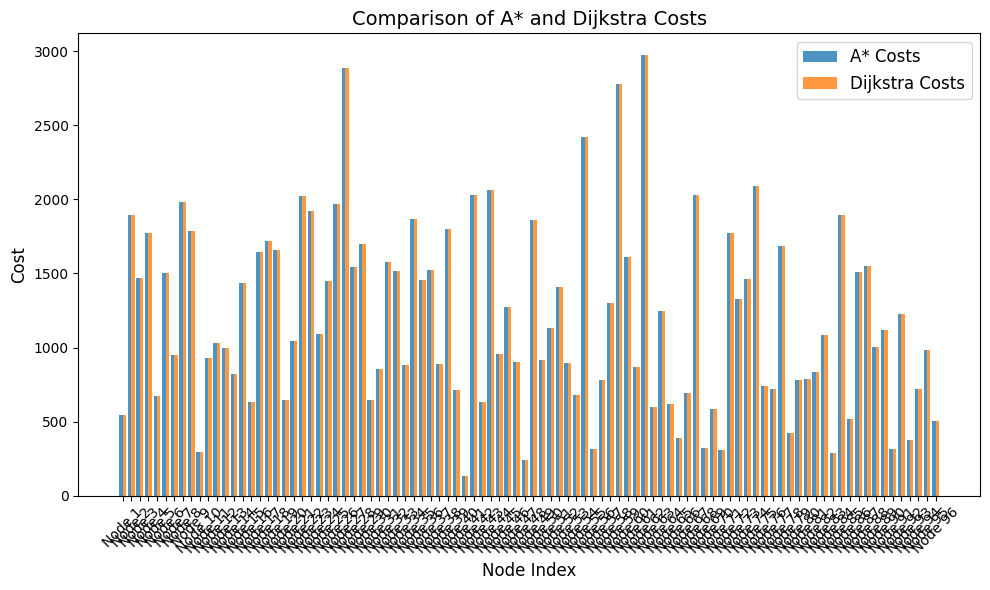

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Create x positions for the bars
x = np.arange(len(costs_a_star))

# Bar width
bar_width = 0.4

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, costs_a_star, width=bar_width, label="A* Costs", alpha=0.8)
plt.bar(x + bar_width/2, costs_dijkstra, width=bar_width, label="Dijkstra Costs", alpha=0.8)

# Add labels, title, and legend
plt.xlabel("Node Index", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.title("Comparison of A* and Dijkstra Costs", fontsize=14)
plt.xticks(x, [f"Node {i+1}" for i in range(len(costs_a_star))], rotation=45, fontsize=10)
plt.legend(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()